<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CRISP-DM-Steps" data-toc-modified-id="CRISP-DM-Steps-1">CRISP DM Steps</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-2">Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Questions-on-the-data" data-toc-modified-id="Questions-on-the-data-2.1">Questions on the data</a></span></li></ul></li><li><span><a href="#Data-Understanding-&amp;-Preparation" data-toc-modified-id="Data-Understanding-&amp;-Preparation-3">Data Understanding &amp; Preparation</a></span><ul class="toc-item"><li><span><a href="#df_calendar" data-toc-modified-id="df_calendar-3.1">df_calendar</a></span><ul class="toc-item"><li><span><a href="#Comments-on-df_calendar:" data-toc-modified-id="Comments-on-df_calendar:-3.1.1">Comments on df_calendar:</a></span></li></ul></li><li><span><a href="#df_listings" data-toc-modified-id="df_listings-3.2">df_listings</a></span><ul class="toc-item"><li><span><a href="#Comments-on-df_listings:" data-toc-modified-id="Comments-on-df_listings:-3.2.1">Comments on df_listings:</a></span></li></ul></li><li><span><a href="#Map-Overview-of-listings:" data-toc-modified-id="Map-Overview-of-listings:-3.3">Map Overview of listings:</a></span></li><li><span><a href="#df_reviews" data-toc-modified-id="df_reviews-3.4">df_reviews</a></span><ul class="toc-item"><li><span><a href="#Comments-on-df_reviews:" data-toc-modified-id="Comments-on-df_reviews:-3.4.1">Comments on df_reviews:</a></span></li></ul></li><li><span><a href="#Insights" data-toc-modified-id="Insights-3.5">Insights</a></span><ul class="toc-item"><li><span><a href="#Which-are-the-areas/neighbourhoods-with-the-highest/lowest-prices?" data-toc-modified-id="Which-are-the-areas/neighbourhoods-with-the-highest/lowest-prices?-3.5.1">Which are the areas/neighbourhoods with the highest/lowest prices?</a></span></li><li><span><a href="#How-do-the-prices-and-bookings-change-throughout-the-year-(create-seasonal-categories?)" data-toc-modified-id="How-do-the-prices-and-bookings-change-throughout-the-year-(create-seasonal-categories?)-3.5.2">How do the prices and bookings change throughout the year (create seasonal categories?)</a></span></li><li><span><a href="#Can-the-prices-be-predicted-with-features-like-neighbourhood,-number-of-rooms,-reviews-etc.?" data-toc-modified-id="Can-the-prices-be-predicted-with-features-like-neighbourhood,-number-of-rooms,-reviews-etc.?-3.5.3">Can the prices be predicted with features like neighbourhood, number of rooms, reviews etc.?</a></span></li></ul></li></ul></li><li><span><a href="#Modeling-&amp;-Evaluation" data-toc-modified-id="Modeling-&amp;-Evaluation-4">Modeling &amp; Evaluation</a></span><ul class="toc-item"><li><span><a href="#Can-we-predict-an-object's-price-with-the-given-data?" data-toc-modified-id="Can-we-predict-an-object's-price-with-the-given-data?-4.1">Can we predict an object's price with the given data?</a></span><ul class="toc-item"><li><span><a href="#Thoughts:" data-toc-modified-id="Thoughts:-4.1.1">Thoughts:</a></span></li></ul></li><li><span><a href="#Let's-try-to-improve-the-prediction-with-categorical-training-data" data-toc-modified-id="Let's-try-to-improve-the-prediction-with-categorical-training-data-4.2">Let's try to improve the prediction with categorical training data</a></span><ul class="toc-item"><li><span><a href="#Conclusion:-The-object-prices-can-be-predicted-with-the-given-data.-Especially-property-types-and-neighbourhoods-are-strong-indicators.-A-more-complex-model-might-achieve-much-better-results!" data-toc-modified-id="Conclusion:-The-object-prices-can-be-predicted-with-the-given-data.-Especially-property-types-and-neighbourhoods-are-strong-indicators.-A-more-complex-model-might-achieve-much-better-results!-4.2.1">Conclusion: The object prices can be predicted with the given data. Especially property types and neighbourhoods are strong indicators. A more complex model might achieve much better results!</a></span></li></ul></li><li><span><a href="#Can-the-review-score-of-an-object-be-predicted?" data-toc-modified-id="Can-the-review-score-of-an-object-be-predicted?-4.3">Can the review score of an object be predicted?</a></span><ul class="toc-item"><li><span><a href="#Conclusion:-The-easy-model-used-is-not-capable-of-predicting-the-review_scores_rating-with-the-given-information." data-toc-modified-id="Conclusion:-The-easy-model-used-is-not-capable-of-predicting-the-review_scores_rating-with-the-given-information.-4.3.1">Conclusion: The easy model used is not capable of predicting the review_scores_rating with the given information.</a></span></li></ul></li></ul></li><li><span><a href="#Question-to-the-reviewer:" data-toc-modified-id="Question-to-the-reviewer:-5">Question to the reviewer:</a></span></li></ul></div>

# Udacity Nano Degree Data Scientist
# Project1: Seattle AirBNB Data

## CRISP DM Steps
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

## Business Understanding
### Questions on the data
- Which are the areas/neighbourhoods with the highest/lowest prices?
- How do the prices change throughout the year (create seasonal categories?)
- Can the prices be predicted with features like neighbourhood, number of rooms, reviews etc.?
- Can the review score of an object be predicted?

In [205]:
import pandas as pd
from IPython.core.display import display, HTML
import gmplot
import random
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

display(HTML("<style>.container { width:80% !important; }</style>"))

pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.max_colwidth', 500)

## Data Understanding & Preparation

In [206]:
def get_basic_df_info(df):
    """
    input:
        df (DataFrame): a data frame of which general information shall be obtained
    output:
        Main DataFrame attributes like shape, info, dtypes, describe-table, nans and example rows.
    """
    display("shape: ", df.shape)
    display("info: ", df.info())
    display("describe: ", df.describe())
    display("duplicates: ", df.duplicated().sum())
    print("total nans: ", df.isna().sum().sum(), " ( = ", (df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100).round(1), "% of all values)")
    display("nunique: ", df.nunique())
    try:
        display("df sample without nans: ", df.dropna().sample(2))
    except:
        display("df sample: ", df.sample(2))
    try:
        display("random row without nans: ", df.dropna().iloc[random.randint(0,df.dropna().shape[0])])
    except:
        display("random row without nans: ", df.iloc[random.randint(0,df.shape[0])])

In [207]:
df_calendar_orig = pd.read_csv("data/calendar.csv")
df_listings_orig = pd.read_csv("data/listings.csv")
df_reviews_orig = pd.read_csv("data/reviews.csv")

### df_calendar

In [208]:
get_basic_df_info(df_calendar_orig)

'shape: '

(1393570, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


'info: '

None

'describe: '

,listing_id
count,1393570.00
mean,5550111.42
std,2962273.53
min,3335.00
25%,3258213.00
50%,6118244.50
75%,8035212.00
max,10340165.00


'duplicates: '

0

total nans:  459028  ( =  8.2 % of all values)


'nunique: '

listing_id    3818
date           365
available        2
price          669
dtype: int64

'df sample without nans: '

,listing_id,date,available,price
533164,7506165,2016-09-24,t,$280.00
357132,8273948,2016-06-14,t,$85.00


'random row without nans: '

listing_id        757840
date          2016-07-11
available              t
price            $550.00
Name: 75014, dtype: object

#### Comments on df_calendar:
- approximately 1.4m entries (4 columns) -> might drop rows with missing prices where needed
- check meaning of "available" categories -> probably t = True and f = False -> switch to binary
- make date column datetime and price column float
- "only" data of one year (365 unique dates)

In [209]:
# work on copy of the original data
df_calendar = df_calendar_orig.copy()
# transform dtype of date column
df_calendar.date = pd.to_datetime(df_calendar.date)
# make available column entries binary
df_calendar.available = df_calendar.available.str.replace("t", "1").str.replace("f", "0").astype(int)
# transform prices to floats
df_calendar.price = df_calendar.price.str[1:].str.replace(",","").astype(float)

In [210]:
# check changes
get_basic_df_info(df_calendar)

'shape: '

(1393570, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  int32         
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 37.2 MB


'info: '

None

'describe: '

,listing_id,available,price
count,1393570.00,1393570.00,934542.00
mean,5550111.42,0.67,137.94
std,2962273.53,0.47,105.06
min,3335.00,0.00,10.00
25%,3258213.00,0.00,75.00
50%,6118244.50,1.00,109.00
75%,8035212.00,1.00,160.00
max,10340165.00,1.00,1650.00


'duplicates: '

0

total nans:  459028  ( =  8.2 % of all values)


'nunique: '

listing_id    3818
date           365
available        2
price          669
dtype: int64

'df sample without nans: '

,listing_id,date,available,price
52279,1198799,2016-03-28,1,70.00
62849,10262971,2016-03-13,1,70.00


'random row without nans: '

listing_id                 716829
date          2016-08-31 00:00:00
available                       1
price                        62.0
Name: 721115, dtype: object

### df_listings

In [211]:
get_basic_df_info(df_listings_orig)

'shape: '

(3818, 92)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

'info: '

None

'describe: '

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3818.00,3818.00,3818.00,3816.00,3816.00,3818.00,3818.00,3818.00,3802.00,3812.00,...,3171.00,3160.00,3165.00,3160.00,3167.00,3163.00,3162.00,0.00,3818.00,3191.00
mean,5550111.42,20160104002432.00,15785555.11,7.16,7.16,47.63,-122.33,3.35,1.26,1.31,...,94.54,9.64,9.56,9.79,9.81,9.61,9.45,NaN,2.95,2.08
std,2962660.48,0.00,14583815.27,28.63,28.63,0.04,0.03,1.98,0.59,0.88,...,6.61,0.70,0.80,0.60,0.57,0.63,0.75,NaN,5.89,1.82
min,3335.00,20160104002432.00,4193.00,1.00,1.00,47.51,-122.42,1.00,0.00,0.00,...,20.00,2.00,3.00,2.00,2.00,4.00,2.00,NaN,1.00,0.02
25%,3258256.25,20160104002432.00,3275204.00,1.00,1.00,47.61,-122.35,2.00,1.00,1.00,...,93.00,9.00,9.00,10.00,10.00,9.00,9.00,NaN,1.00,0.69
50%,6118244.50,20160104002432.00,10558142.00,1.00,1.00,47.62,-122.33,3.00,1.00,1.00,...,96.00,10.00,10.00,10.00,10.00,10.00,10.00,NaN,1.00,1.54
75%,8035126.75,20160104002432.00,25903093.25,3.00,3.00,47.66,-122.31,4.00,1.00,2.00,...,99.00,10.00,10.00,10.00,10.00,10.00,10.00,NaN,2.00,3.00
max,10340165.00,20160104002432.00,53208610.00,502.00,502.00,47.73,-122.24,16.00,8.00,7.00,...,100.00,10.00,10.00,10.00,10.00,10.00,10.00,NaN,37.00,12.15


'duplicates: '

0

total nans:  29819  ( =  8.5 % of all values)


'nunique: '

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
                                    ... 
cancellation_policy                    3
require_guest_profile_picture          2
require_guest_phone_verification       2
calculated_host_listings_count        18
reviews_per_month                    654
Length: 92, dtype: int64

'df sample: '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
714,2979387,https://www.airbnb.com/rooms/2979387,20160104002432,2016-01-04,UNIVERSITY DISTRC CHARMER (Sleep10),"This elegant home SLEEPS 10 Guests. Centrally Located in Seattle's University District, this fully furnished 3 Bdrm/2-Bath, 2100 SF home and a kitchen that features a booth style eating area.Walk only 2 blocks to main drag of abudance restaurants etc",YOUR OWN HOME: 2100 SF HUGE HOME- UniversIty District world charm is OH SO CLOSE to UW CAMPUS(half mile)/Seattle(4mile). This home has remained beautiful in its 1911 Elegant natural look full of CHARACTER. It has newly varnished hardwood in LR & Dining room. Plush New carpets through out home. 3 total bedrooms. 2 full bathrooms. LARGE DINING. Great for large groups. Main Floor- Bedroom #1 has one queen size bed and a bunk bed.(sleep 4) Bedroom #2 has a queen bed. (Sleeps 2) UPPER FLOOR: ...,"This elegant home SLEEPS 10 Guests. Centrally Located in Seattle's University District, this fully furnished 3 Bdrm/2-Bath, 2100 SF home and a kitchen that features a booth style eating area.Walk only 2 blocks to main drag of abudance restaurants etc YOUR OWN HOME: 2100 SF HUGE HOME- UniversIty District world charm is OH SO CLOSE to UW CAMPUS(half mile)/Seattle(4mile). This home has remained beautiful in its 1911 Elegant natural look full of CHARACTER. It has newly varnished hardwood in LR ...",none,"This Univeristy neighborhood has lots of homes that have been there for ages. seasoned home owners are proud to live here. It close to EVERYWEHRE. WALK TO STORE/SHOPS/ UNIVERSITY STRIP/MINI MART/WALGREEN/SAFEWAY. FREEWAYS IS 2 BLOCKS FROM HOME. SEATTLE IS 5 MILES TO DOWNTOWN SEATTLE SPACE NEEDLE, KEY ARENA, PIKES PLACE MARKET, WATER FRONT, LAKE UNION, GREEN LAKE, WALLINGFORD ZOO, BIKE EVERYWHERE ON CAMPUS. TAKE A CANOE ON LAKE WASHINGTON AT THE UNIVERSITY RENTAL. COFFEE SHOPS, BUBBLE TEA, ...",...,9.00,f,NaN,WASHINGTON,f,strict,f,f,2,1.02
1617,5036739,https://www.airbnb.com/rooms/5036739,20160104002432,2016-01-04,Spacious Studio Condo,"Spacious Studio Condo, located just steps from all of down town Seattle's hot spots. Walking distance to Pike Place Market and More. Currently available weekend of 1/23. Come stay and see the Seahawks play!",NaN,"Spacious Studio Condo, located just steps from all of down town Seattle's hot spots. Walking distance to Pike Place Market and More. Currently available weekend of 1/23. Come stay and see the Seahawks play!",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


'random row without nans: '

id                                                               6390214
listing_url                         https://www.airbnb.com/rooms/6390214
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                      Centrally located comfy studio
                                                    ...                 
cancellation_policy                                             flexible
require_guest_profile_picture                                          f
require_guest_phone_verification                                       f
calculated_host_listings_count                                         1
reviews_per_month                                                   2.68
Name: 2636, Length: 92, dtype: object

#### Comments on df_listings:
- I'll reduce the amount of columns to the ones that I consider interesting/useful for nice insights and training models
- understand meaning of the 3 neighbourhood columns -> I suppose the _group_cleansed one is containing a corrected and generalized version of the other ones, so I'll work with that
- since we are only analyzing seattle data, there is no need for data like zipcode, city, state, country etc.
- unfortunately there is only few data in the square_feet column! Maybe it'll still be useful
- convert dtype of price column
- minimum of square_feet is 0? -> replace zeros with "nan"
- lower all characters in categorical columns and keep only streetname in street column
- check boxplots of numeric columns

In [212]:
# reduce df_listings to relevant columns
df_listings = df_listings_orig.copy().iloc[:, [0,4,5,7,16,34,37,45,46,48,49,50,51,52,53,56,57,73,76,77,78,79,80,81,82,91]]
# replace zeros in square_feet column with nan
df_listings.square_feet.replace(0, np.nan, inplace=True)
# transform prices to floats
df_listings.price = df_listings.price.str[1:].str.replace(",","").astype(float)

In [213]:
df_listings[["street", "neighbourhood_group_cleansed", "property_type"]].head(5)
display(df_listings[["street", "neighbourhood_group_cleansed", "property_type"]].nunique())

street                          1442
neighbourhood_group_cleansed      17
property_type                     16
dtype: int64

In [214]:
# lower all characters & only keep streetname
list_catCols = df_listings.select_dtypes(include=['object']).columns
df_listings[list_catCols] = df_listings[list_catCols].apply(lambda col: col.str.lower())
df_listings.street = df_listings.street.str.split(",").apply(lambda x: x[0])
df_listings[["street", "neighbourhood_group_cleansed", "property_type"]].nunique()

street                          1232
neighbourhood_group_cleansed      17
property_type                     16
dtype: int64

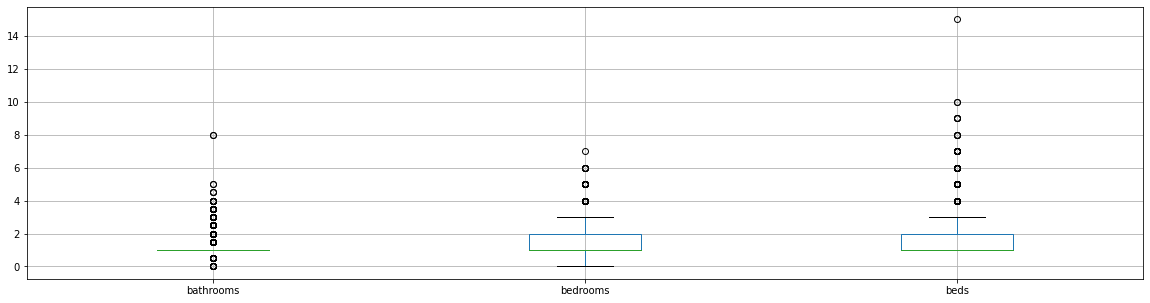

In [215]:
# check boxplots
df_listings[["bathrooms", "bedrooms", "beds"]].boxplot(figsize=(20,5));

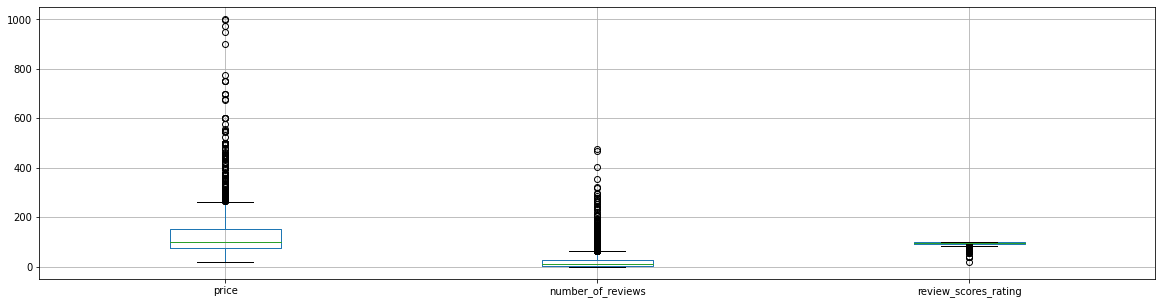

In [216]:
df_listings[["price", "number_of_reviews", "review_scores_rating"]].boxplot(figsize=(20,5));

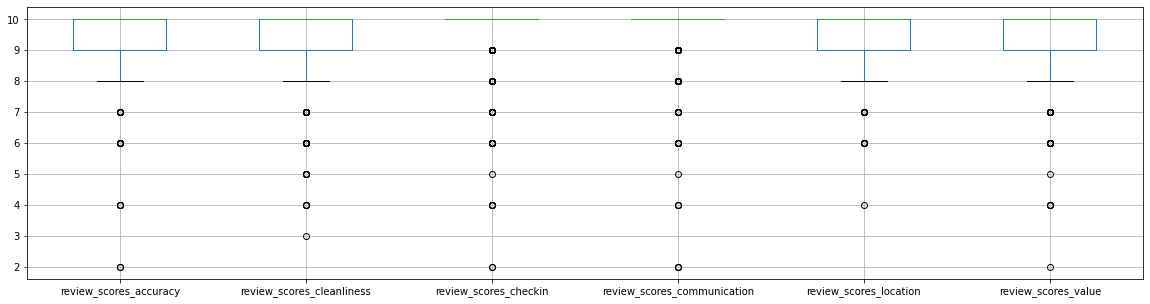

In [217]:
df_listings[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].boxplot(figsize=(20,5));

In [218]:
# check df stats after cleaning
get_basic_df_info(df_listings)

'shape: '

(3818, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   name                          3818 non-null   object 
 2   summary                       3641 non-null   object 
 3   description                   3818 non-null   object 
 4   host_id                       3818 non-null   int64  
 5   street                        3818 non-null   object 
 6   neighbourhood_group_cleansed  3818 non-null   object 
 7   latitude                      3818 non-null   float64
 8   longitude                     3818 non-null   float64
 9   property_type                 3817 non-null   object 
 10  room_type                     3818 non-null   object 
 11  accommodates                  3818 non-null   int64  
 12  bathrooms                     3802 non-null   float64
 13  bed

'info: '

None

'describe: '

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.00,3818.00,3818.00,3818.00,3818.00,3802.00,3812.00,3817.00,92.00,3818.00,3818.00,3171.00,3160.00,3165.00,3160.00,3167.00,3163.00,3162.00,3191.00
mean,5550111.42,15785555.11,47.63,-122.33,3.35,1.26,1.31,1.74,901.07,127.98,22.22,94.54,9.64,9.56,9.79,9.81,9.61,9.45,2.08
std,2962660.48,14583815.27,0.04,0.03,1.98,0.59,0.88,1.14,658.21,90.25,37.73,6.61,0.70,0.80,0.60,0.57,0.63,0.75,1.82
min,3335.00,4193.00,47.51,-122.42,1.00,0.00,0.00,1.00,1.00,20.00,0.00,20.00,2.00,3.00,2.00,2.00,4.00,2.00,0.02
25%,3258256.25,3275204.00,47.61,-122.35,2.00,1.00,1.00,1.00,476.25,75.00,2.00,93.00,9.00,9.00,10.00,10.00,9.00,9.00,0.69
50%,6118244.50,10558142.00,47.62,-122.33,3.00,1.00,1.00,1.00,760.00,100.00,9.00,96.00,10.00,10.00,10.00,10.00,10.00,10.00,1.54
75%,8035126.75,25903093.25,47.66,-122.31,4.00,1.00,2.00,2.00,1200.00,150.00,26.00,99.00,10.00,10.00,10.00,10.00,10.00,10.00,3.00
max,10340165.00,53208610.00,47.73,-122.24,16.00,8.00,7.00,15.00,3000.00,1000.00,474.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,12.15


'duplicates: '

0

total nans:  9132  ( =  9.2 % of all values)


'nunique: '

id                              3818
name                            3785
summary                         3477
description                     3742
host_id                         2751
street                          1232
neighbourhood_group_cleansed      17
latitude                        3818
longitude                       3818
property_type                     16
room_type                          3
accommodates                      15
bathrooms                         12
bedrooms                           8
beds                              11
square_feet                       46
price                            273
number_of_reviews                195
review_scores_rating              42
review_scores_accuracy             7
review_scores_cleanliness          8
review_scores_checkin              8
review_scores_communication        8
review_scores_location             6
review_scores_value                8
reviews_per_month                654
dtype: int64

'df sample without nans: '

,id,name,summary,description,host_id,street,neighbourhood_group_cleansed,latitude,longitude,property_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
2125,202174,"modern retreat, high end amenities","our ""green built"", 1+ bedroom, 2 bath town home is a modernists treat! on a quiet street with a dedicated parking space in back, it's located close to the stadiums, seattle u, chinatown and capitol hill. enjoy local beer/wine upon your arrival.","our ""green built"", 1+ bedroom, 2 bath town home is a modernists treat! on a quiet street with a dedicated parking space in back, it's located close to the stadiums, seattle u, chinatown and capitol hill. enjoy local beer/wine upon your arrival. a modern, well appointed town home within walking distance to capitol hill (hottest restaurant and bar scene in seattle) and chinatown (great for cheap eats). high-end kitchen and cozy heated floors. soaring ceilings in the huge bedroom, luxury bat...",58235,e fir st,beacon hill,47.60,-122.32,house,...,159.00,14,96.00,10.00,10.00,10.00,10.00,9.00,9.00,0.33
1308,1493197,2 bed space needle view,"this cozy two bedroom offers your own private patio deck and a (phone number hidden) dollar view of the space needle from the comfort of ""home"".","this cozy two bedroom offers your own private patio deck and a (phone number hidden) dollar view of the space needle from the comfort of ""home"". this beautiful two bedroom, 1 bathroom modern condo is located where belltown meets the seattle center and is located in the shadow of seattle's world famous space needle. nightlife, clubs, museums, restaurants and the arts are all just steps from your door in this modern two bedroom condo. located in seattle's belltown neighborhood and one block a...",74305,cedar street,downtown,47.62,-122.35,apartment,...,275.00,22,95.00,9.00,10.00,10.00,10.00,10.00,9.00,0.78


'random row without nans: '

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7369
name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Map Overview of listings:

In [219]:
df_map = df_listings[["latitude", "longitude", "neighbourhood_group_cleansed"]]

lat_lim = [df_map.latitude.min(), df_map.latitude.max(), df_map.latitude.max(), df_map.latitude.min(), df_map.latitude.min()]
lon_lim = [df_map.longitude.min(), df_map.longitude.min(), df_map.longitude.max(), df_map.longitude.max(), df_map.longitude.min()]

gmap = gmplot.GoogleMapPlotter(df_map.latitude.min(), df_map.longitude.min(), 10)

# Draw border with min/max coordinates
gmap.plot(lat_lim, lon_lim, "cornflowerblue", edge_width = 2.5)

# scatterplot on google maps with starting locations
gmap.scatter(df_map.latitude, df_map.longitude, color="yellow", size=100, marker=False)
    
gmap.draw("map.html")

IFrame(src="map.html", width='30%', height='500px')

### df_reviews

In [220]:
get_basic_df_info(df_reviews_orig)

'shape: '

(84849, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


'info: '

None

'describe: '

,listing_id,id,reviewer_id
count,84849.00,84849.00,84849.00
mean,3005067.19,30587645.36,17013006.64
std,2472877.11,16366130.20,13537038.27
min,4291.00,3721.00,15.00
25%,794633.00,17251274.00,5053141.00
50%,2488228.00,32288093.00,14134759.00
75%,4694479.00,44576477.00,27624023.00
max,10248139.00,58736511.00,52812740.00


'duplicates: '

0

total nans:  18  ( =  0.0 % of all values)


'nunique: '

listing_id        3191
id               84849
date              1930
reviewer_id      75730
reviewer_name    14380
comments         84136
dtype: int64

'df sample without nans: '

,listing_id,id,date,reviewer_id,reviewer_name,comments
7449,421168,28099143,2015-03-17,27545142,Rene,Samantha had a wonderfully cozy studio that provided us with plenty of options as to what there is to do. Highly recommended!
9189,134091,1758991,2012-07-21,1863834,Françoise,"great house, located in a nice and quiet area. We especially enjoyed the beautifully equipped kitchen and the convenient setting of the eating space that enabled us to feel relaxed and cook in a pleasant atmosphere. Joe replied quickly and kindly. No wonder I would like to rent again when I come back;"


'random row without nans: '

listing_id                                                                                                                                                                                                                                                                                                                                                                                                                                         456040
id                                                                                                                                                                                                                                                                                                                                                                                                                                                9286250
date                                                                                                                

#### Comments on df_reviews:
- transform date column to datetime
- rename id column to review_id for clarity
- rest looks good

In [221]:
# work on copy of original data frame
df_reviews = df_reviews_orig.copy()
# transform date columns dtype to datetime
df_reviews.date = pd.to_datetime(df_reviews.date)
# rename id column
df_reviews.rename(columns={"id": "review_id"}, inplace=True)

In [222]:
get_basic_df_info(df_reviews)

'shape: '

(84849, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   review_id      84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


'info: '

None

'describe: '

,listing_id,review_id,reviewer_id
count,84849.00,84849.00,84849.00
mean,3005067.19,30587645.36,17013006.64
std,2472877.11,16366130.20,13537038.27
min,4291.00,3721.00,15.00
25%,794633.00,17251274.00,5053141.00
50%,2488228.00,32288093.00,14134759.00
75%,4694479.00,44576477.00,27624023.00
max,10248139.00,58736511.00,52812740.00


'duplicates: '

0

total nans:  18  ( =  0.0 % of all values)


'nunique: '

listing_id        3191
review_id        84849
date              1930
reviewer_id      75730
reviewer_name    14380
comments         84136
dtype: int64

'df sample without nans: '

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
30880,103466,35780947,2015-06-22,28872787,Mary,The Phinney Ridge Cottage was perfect fit for us. It offered all modern conveniences and was literally a block away from many good places to eat. Sonal was easy to communicate with and very helpful!
27985,397117,46114921,2015-09-08,4491565,Anna,"The apartment is in a great location, as stated, only a few blocks away from Pikes Place Market and in the heart of downtown. The place is fully stocked with amenities including linens, towels, and shampoo. In addition, everything in her kitchen was fully functional, and had lots of channels on TV. Lauren was super accommodating by letting us check in early and also checking out later than listed."


'random row without nans: '

listing_id                                                                                                                                                            1060467
review_id                                                                                                                                                            17948155
date                                                                                                                                                      2014-08-19 00:00:00
reviewer_id                                                                                                                                                           4101920
reviewer_name                                                                                                                                                         Xiaowei
comments         The apartment is very nice, location is very close to Space Needle. Hande is a great host, I highly recommend thi

### Insights

#### Which are the areas/neighbourhoods with the highest/lowest prices?

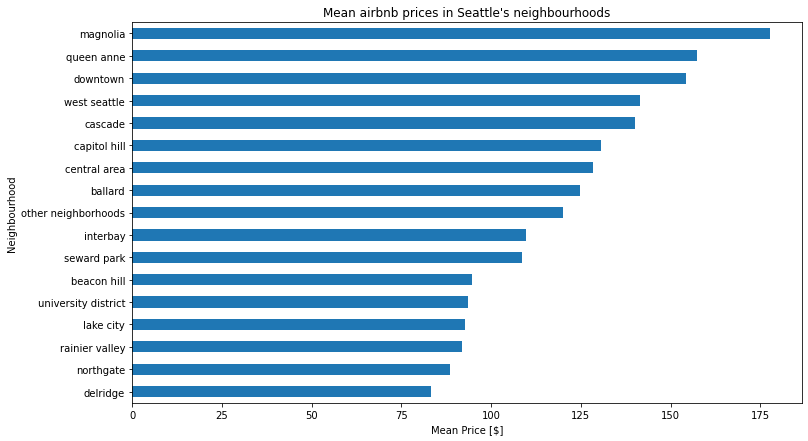

In [223]:
df_listings.groupby(by="neighbourhood_group_cleansed").mean().price.sort_values(ascending=True).plot.barh(figsize=(12,7), title="Mean airbnb prices in Seattle's neighbourhoods");
plt.xlabel("Mean Price [$]")
plt.ylabel("Neighbourhood");

#### How do the prices and bookings change throughout the year (create seasonal categories?)

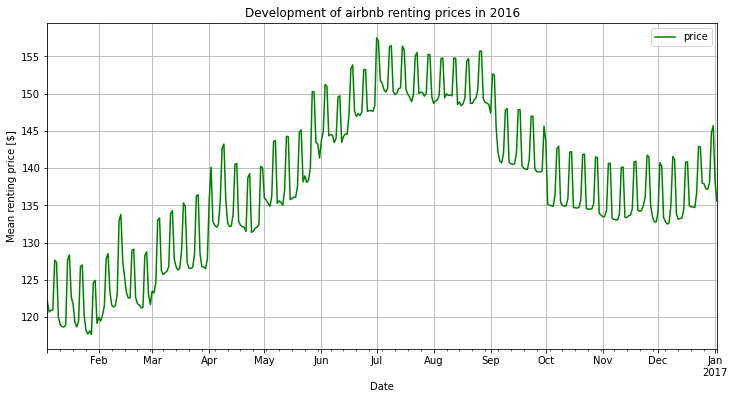

In [224]:
df_calendar.groupby(by="date").mean()[["price"]].plot(figsize=(12, 6), color="green", xlabel="Date", ylabel="Mean renting price [$]", title="Development of airbnb renting prices in 2016", grid=True);
# plt.xlim("2016-03-01", "2016-03-16");

#### Can the prices be predicted with features like neighbourhood, number of rooms, reviews etc.?

## Modeling & Evaluation

### Can we predict an object's price with the given data?

#### Thoughts:
- Do i need to fill NaNs?
- which columns will have the biggest impact on the prediction?
- Normalize data!
- Do i need to create Dummies of the Categorical Features?
- Deal with Imbalance? Not really, since we just have one value to predict.

In [225]:
df_listings.columns

Index(['id', 'name', 'summary', 'description', 'host_id', 'street',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [226]:
# columns to work on before using as training data:
# categorical: "street", "neighbourhood_group_cleansed", "property_type", "room_type"
# numeric: "square_feet" -> too many nans (will be dropped)
df_listings[["host_id", "bathrooms", "bedrooms", "beds", "square_feet", "accommodates", "number_of_reviews", "review_scores_rating", 
       "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", 
      "price"]].isna().sum()

host_id                           0
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3726
accommodates                      0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
reviews_per_month               627
price                             0
dtype: int64

In [227]:
# drop the listings with NaN in the review_scores, since i think replacing the NaNs with zeros or means would biase the result and 3140 listings might still be enough for a model.
df_listings[["host_id", "bathrooms", "bedrooms", "beds", "accommodates", "number_of_reviews", "review_scores_rating", 
       "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", 
      "price"]].dropna().shape

(3140, 15)

In [228]:
def do_ML(df, Xlist, yLabel):
    """
    input:
        df (df): DataFrame containing all needed training and testing data
        Xlist (list(str)): list of strings containing the column names of df used as X-Vector/Matrix
        yLabel (str): name of column of df to be predicted (y-Value/Vector)
    output:
        X_train, X_test, y_train, y_test, model, y_test_preds, rsquared_score for evaluation purposes
    """
    
    #Drop NaN-Rows
    df = df[(Xlist+[yLabel])].dropna()
    print("Shape of the used df without NaNs: ", df.shape)
    
    #Split into explanatory and response variables
    X = df[Xlist]
    y = df[yLabel]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)  # , random_state=42
    
    model = LinearRegression(normalize=True)
    """
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LinearRegression()),
        #("clf", RandomForestClassifier())
    ])
    """
    
    #Fit model/pipeline
    #pipeline.fit(X_train, y_train)
    model.fit(X_train, y_train)
    
    #Predict and score the model
    #y_test_preds = pipeline.predict(X_test)
    y_test_preds = model.predict(X_test)

    #Rsquared and y_test
    rsquared_score = r2_score(y_test, y_test_preds)
    length_y_test = len(y_test)

    print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
    
    return X_train, X_test, y_train, y_test, model, y_test_preds, rsquared_score

In [229]:
# first try of training without categorical columns:
X_train, X_test, y_train, y_test, model, y_test_preds, rsquared_score = do_ML(df_listings, 
      ["host_id", "bathrooms", "bedrooms", "beds", "accommodates", "number_of_reviews", "review_scores_rating", 
       "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"], 
      "price")

Shape of the used df without NaNs:  (3140, 15)
The r-squared score for your model was 0.46104570122225397 on 1570 values.


In [230]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
        coefficients: the coefficients of the linear model 
        X_train (df): the training data, so the column names can be used
    OUTPUT:
        coefs_df (df): a dataframe holding the coefficient, estimate, and abs(estimate)
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = model.coef_
    coefs_df['abs_coefs'] = np.abs(model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    
    return coefs_df

In [231]:
# show coefficients with highest impact on model
coef_df = coef_weights(pipeline.coef_, X_train)

#A quick look at the top results
coef_df.reset_index().drop(columns="index")

,est_int,coefs,abs_coefs
0,bathrooms,25.20,25.20
1,review_scores_location,19.10,19.10
2,bedrooms,18.91,18.91
3,review_scores_value,-17.83,17.83
4,accommodates,16.13,16.13
5,review_scores_checkin,-8.01,8.01
6,review_scores_accuracy,6.35,6.35
7,review_scores_cleanliness,4.93,4.93
8,reviews_per_month,-4.67,4.67
9,beds,1.83,1.83


### Let's try to improve the prediction with categorical training data

In [232]:
# Dummy the categorical variables
list_dummyCols = ["neighbourhood_group_cleansed", "property_type", "room_type"]
df_listings2 = df_listings.copy().drop(columns=["name", "description", "summary", "street", "square_feet", "latitude", "longitude"])
for dum in  list_dummyCols:
    # for each cat add dummy var, drop original column
    df_listings2 = pd.concat([df_listings2.drop(dum, axis=1), pd.get_dummies(df_listings2[dum], prefix=dum, prefix_sep='_', drop_first=True)], axis=1)

In [233]:
df_listings2.shape

(3818, 49)

In [234]:
# training with categorical features
X_train, X_test, y_train, y_test, model, y_test_preds, rsquared_score = do_ML(df_listings2, list(df_listings2.drop(columns="price").columns), "price")

Shape of the used df without NaNs:  (3140, 49)
The r-squared score for your model was 0.574818681189223 on 1570 values.


In [235]:
# show coefficients with highest impact on model
coef_df = coef_weights(model.coef_, X_train)

#A quick look at the top results
pretty_df = coef_df.reset_index().drop(columns="index")
pretty_df.columns = ["Feature", "Coefficient", "Coefficient_abs"]
pretty_df

,Feature,Coefficient,Coefficient_abs
0,property_type_boat,416.93,416.93
1,room_type_shared room,-67.06,67.06
2,property_type_dorm,-56.55,56.55
3,neighbourhood_group_cleansed_magnolia,48.73,48.73
4,property_type_cabin,36.70,36.70
5,room_type_private room,-36.18,36.18
6,neighbourhood_group_cleansed_downtown,30.54,30.54
7,neighbourhood_group_cleansed_delridge,-28.33,28.33
8,neighbourhood_group_cleansed_queen anne,27.80,27.80
9,neighbourhood_group_cleansed_cascade,27.76,27.76


#### Conclusion: The object prices can be predicted with the given data. Especially property types and neighbourhoods are strong indicators. A more complex model might achieve much better results!

### Can the review score of an object be predicted?

In [236]:
# first try of training without categorical columns:
list_reviewScores = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]
X_train, X_test, y_train, y_test, model, y_test_preds, rsquared_score = do_ML(df_listings2, list(df_listings2.drop(columns=list_reviewScores).columns), "review_scores_rating")

Shape of the used df without NaNs:  (3153, 43)
The r-squared score for your model was 0.028415302129295994 on 1577 values.


In [237]:
# show coefficients with highest impact on model
coef_df = coef_weights(model.coef_, X_train)

#A quick look at the top results
pretty_df = coef_df.reset_index().drop(columns="index")
pretty_df.columns = ["Feature", "Coefficient", "Coefficient_abs"]
pretty_df

,Feature,Coefficient,Coefficient_abs
0,neighbourhood_group_cleansed_university district,-6.96,6.96
1,property_type_dorm,-6.75,6.75
2,neighbourhood_group_cleansed_interbay,-5.08,5.08
3,neighbourhood_group_cleansed_cascade,-3.62,3.62
4,property_type_bungalow,2.68,2.68
5,property_type_boat,2.62,2.62
6,neighbourhood_group_cleansed_downtown,-1.84,1.84
7,neighbourhood_group_cleansed_beacon hill,-1.66,1.66
8,property_type_townhouse,1.60,1.60
9,property_type_treehouse,1.46,1.46


#### Conclusion: The easy model used is not capable of predicting the review_scores_rating with the given information.